# Подготовка данных

## Зугружение данных. Удаление аномалий

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

In [26]:
adult = pd.read_csv('../data/Adult/adult_preprocessed.csv',index_col="index")

In [27]:
adult.head(5)

Age  Workclass_0  Workclass_1  Workclass_2  Workclass_3  Fnlwgt  \
index                                                                    
0       39            0            0            0            1   77516   
1       50            0            0            1            0   83311   
2       38            0            0            1            1  215646   
3       53            0            0            1            1  234721   
4       28            0            0            1            1  338409   

       Education_0  Education_1  Education_2  Education_3  ...  Capital-gain  \
index                                                      ...                 
0                0            0            0            0  ...          2174   
1                0            0            0            0  ...             0   
2                0            0            0            1  ...             0   
3                0            0            0            1  ...             0   
4                0            0            0            0  ...             0   

       Capital-loss  Hours-per-week  Native-country_0  Native-country_1  \
index                                                                     
0                 0              40                 0                 0   
1                 0              13                 0                 0   
2                 0              40                 0                 0   
3                 0              40                 0                 0   
4                 0              40                 0                 0   

       Native-country_2  Native-country_3  Native-country_4  Native-country_5  \
index                                                                           
0                     0                 0                 0                 1   
1                     0                 0                 0                 1   
2                     0                 0                 0                 1   
3                     0                 0                 0                 1   
4                     0                 0                 1                 0   

       Wage  
index        
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 37 columns]

In [28]:
adult.shape

(48842, 37)

Рассмотрим вещественные числа

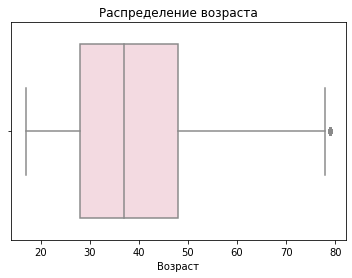

In [34]:
plot = sns.boxplot(x = "Age",
                   data = adult,
                   palette = ["#f7d6dfff"])
plot.set_title("Распределение возраста")
plot.axes.set_xlabel("Возраст")
plt.show()

In [35]:
adult = adult.query("Age < 80")

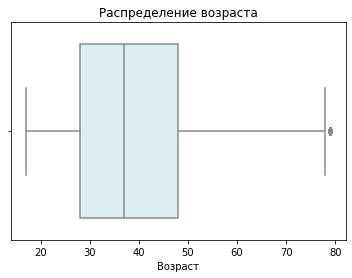

In [36]:
plot = sns.boxplot(x = "Age",
                   data = adult,
                   palette = ["#d8eff5ff"])
plot.set_title("Распределение возраста")
plot.axes.set_xlabel("Возраст")
plt.show()

In [37]:
adult.shape

(48656, 37)

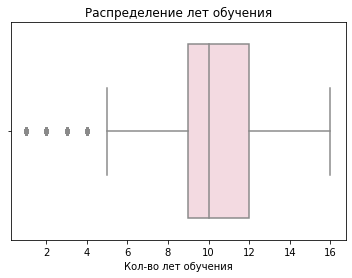

In [38]:
plot = sns.boxplot(x = "Education-num",
                   data = adult,
                   palette = ["#f7d6dfff"])
plot.set_title("Распределение лет обучения")
plot.axes.set_xlabel("Кол-во лет обучения")
plt.show()

In [39]:
adult = adult.loc[adult['Education-num'] >= 5]

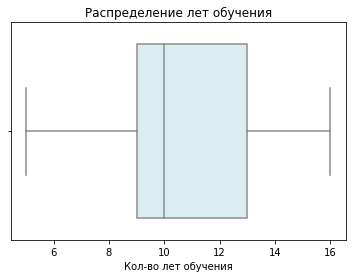

In [40]:
plot = sns.boxplot(x = "Education-num",
                   data = adult,
                   palette = ["#d8eff5ff"])
plot.set_title("Распределение лет обучения")
plot.axes.set_xlabel("Кол-во лет обучения")
plt.show()

In [41]:
adult.shape

(46897, 37)

Было удаленно 2к записей

## Нормирование

Разобьем выборку на две матрицы:
- матрица с признаками объектов,
- матрица с ответами.

In [42]:
X = adult.iloc[:, :-1].values
y = adult.replace(1, '<=50K').replace(0, '>50K').iloc[:, 36].values

print("Матрица признаков: ")
print(X[0:4])
print("Вектор ответов: ")
print(y[0:4])
print("Размеры:")
print("X: ", len(X),", ",len(X[0]))
print("y: ", len(y),", 1")

Матрица признаков: 
[[    39      0      0      0      1  77516      0      0      0      0
       1     13      0      0      1      0      0      0      1      0
       0      1      0      0      1      0      1   2174      0     40
       0      0      0      0      0      1]
 [    50      0      0      1      0  83311      0      0      0      0
       1     13      0      1      0      0      0      1      0      0
       1      0      0      0      1      0      1      0      0     13
       0      0      0      0      0      1]
 [    38      0      0      1      1 215646      0      0      0      1
       0      9      0      1      1      0      0      1      1      0
       0      1      0      0      1      0      1      0      0     40
       0      0      0      0      0      1]
 [    53      0      0      1      1 234721      0      0      0      1
       1      7      0      1      0      0      0      1      1      0
       1      0      0      1      0      0      1   

Из матрицы с признаками выделим столбцы, которые относяться к вещественным признакам, чтобы отмасштабировать

In [43]:
real_columns = [0, 5, 11, 27, 28, 29]
cat_columns = list(set(range(36)) - set(real_columns))

print("real_columns: ", real_columns)
print("cat_columns: ", cat_columns)

real_columns:  [0, 5, 11, 27, 28, 29]
cat_columns:  [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35]


Разделим матрицу X

In [44]:
X_cat = np.delete(X, real_columns, axis = 1)
X_real = np.delete(X, cat_columns, axis = 1)

Воспользуемся стандартным масштабированием


In [45]:
scaler = StandardScaler()
scaler.fit(X_real)

X_real = scaler.transform(X_real)

print("X_real: ", X_real[0:2])

X_real:  [[ 0.06248348 -1.05866518  1.18991866  0.14101518 -0.21866998 -0.04206619]
 [ 0.89176047 -1.00365428  1.18991866 -0.14626789 -0.21866998 -2.23458343]]


Обратно соединяем столбцы

In [46]:
X_new = np.hstack((X_real, X_cat))

print(X_new[0:6])

[[ 0.06248348 -1.05866518  1.18991866  0.14101518 -0.21866998 -0.04206619
   0.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.          1.          0.          0.
   1.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.        ]
 [ 0.89176047 -1.00365428  1.18991866 -0.14626789 -0.21866998 -2.23458343
   0.          0.          1.          0.          0.          0.
   0.          0.          1.          0.          1.          0.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.        ]
 [-0.01290533  0.25257815 -0.5968691  -0.14626789 -0.21866998 -0.04206619
   0.          0.          1.          1.          0.          0.
   0.          1.          0.     

## Сохранение

In [50]:
adult_new = pd.DataFrame(X_new)
adult_new['y'] = y
adult_new.index.name = 'index'
adult_new.head()

0         1         2         3        4         5    6    7  \
index                                                                        
0      0.062483 -1.058665  1.189919  0.141015 -0.21867 -0.042066  0.0  0.0   
1      0.891760 -1.003654  1.189919 -0.146268 -0.21867 -2.234583  0.0  0.0   
2     -0.012905  0.252578 -0.596869 -0.146268 -0.21867 -0.042066  0.0  0.0   
3      1.117927  0.433654 -1.490263 -0.146268 -0.21867 -0.042066  0.0  0.0   
4     -0.766794  1.417945  1.189919 -0.146268 -0.21867 -0.042066  0.0  0.0   

         8    9  ...   27   28   29   30   31   32   33   34   35     y  
index            ...                                                     
0      0.0  1.0  ...  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  >50K  
1      1.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  >50K  
2      1.0  1.0  ...  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  >50K  
3      1.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  >50K  
4      1.0  1.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  >50K  

[5 rows x 37 columns]

In [51]:
adult_new.to_csv('../data/Adult/adult_classification.csv')